In [1]:
import csv
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import colors
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

import numpy as np
import geopandas as gpd
import pandas as pd
from fiona.crs import from_epsg
import pysal as ps

import shapely

#from sklearn import naive_bayes
#from sklearn import svm
#from sklearn.model_selection import train_test_split
#from sklearn import cluster

import ast
from cStringIO import StringIO
import requests
import os
import json
import urllib
import urllib2

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
url='https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=GeoJSON'
filebuffer = urllib.urlretrieve(url, filename='Data/CensusTracks.geojson')
fname = 'Data/CensusTracks.geojson'
tracks = gpd.GeoDataFrame.from_file(fname)
print tracks.crs 

{'init': u'epsg:4326'}


In [4]:
tracks.head(3)

boro_code boro_ct_2010      boro_name cdeligibil ct_2010 ctlabel  \
0         5      5000900  Staten Island          I  000900       9   
1         1      1009800      Manhattan          I  009800      98   
2         1      1010000      Manhattan          I  010000     100   

                                            geometry ntacode  \
0  (POLYGON ((-74.07920577013245 40.6434307837456...    SI22   
1  (POLYGON ((-73.96432543478758 40.7563815309909...    MN19   
2  (POLYGON ((-73.96802436915851 40.7595781400528...    MN19   

                                     ntaname  puma     shape_area  \
0  West New Brighton-New Brighton-St. George  3903  2497009.69813   
1                    Turtle Bay-East Midtown  3808  1906016.35002   
2                    Turtle Bay-East Midtown  3808  1860938.37721   

      shape_leng  
0  7729.01679376  
1  5534.19981063  
2  5692.16873705

In [5]:
tracks.shape

(2166, 12)

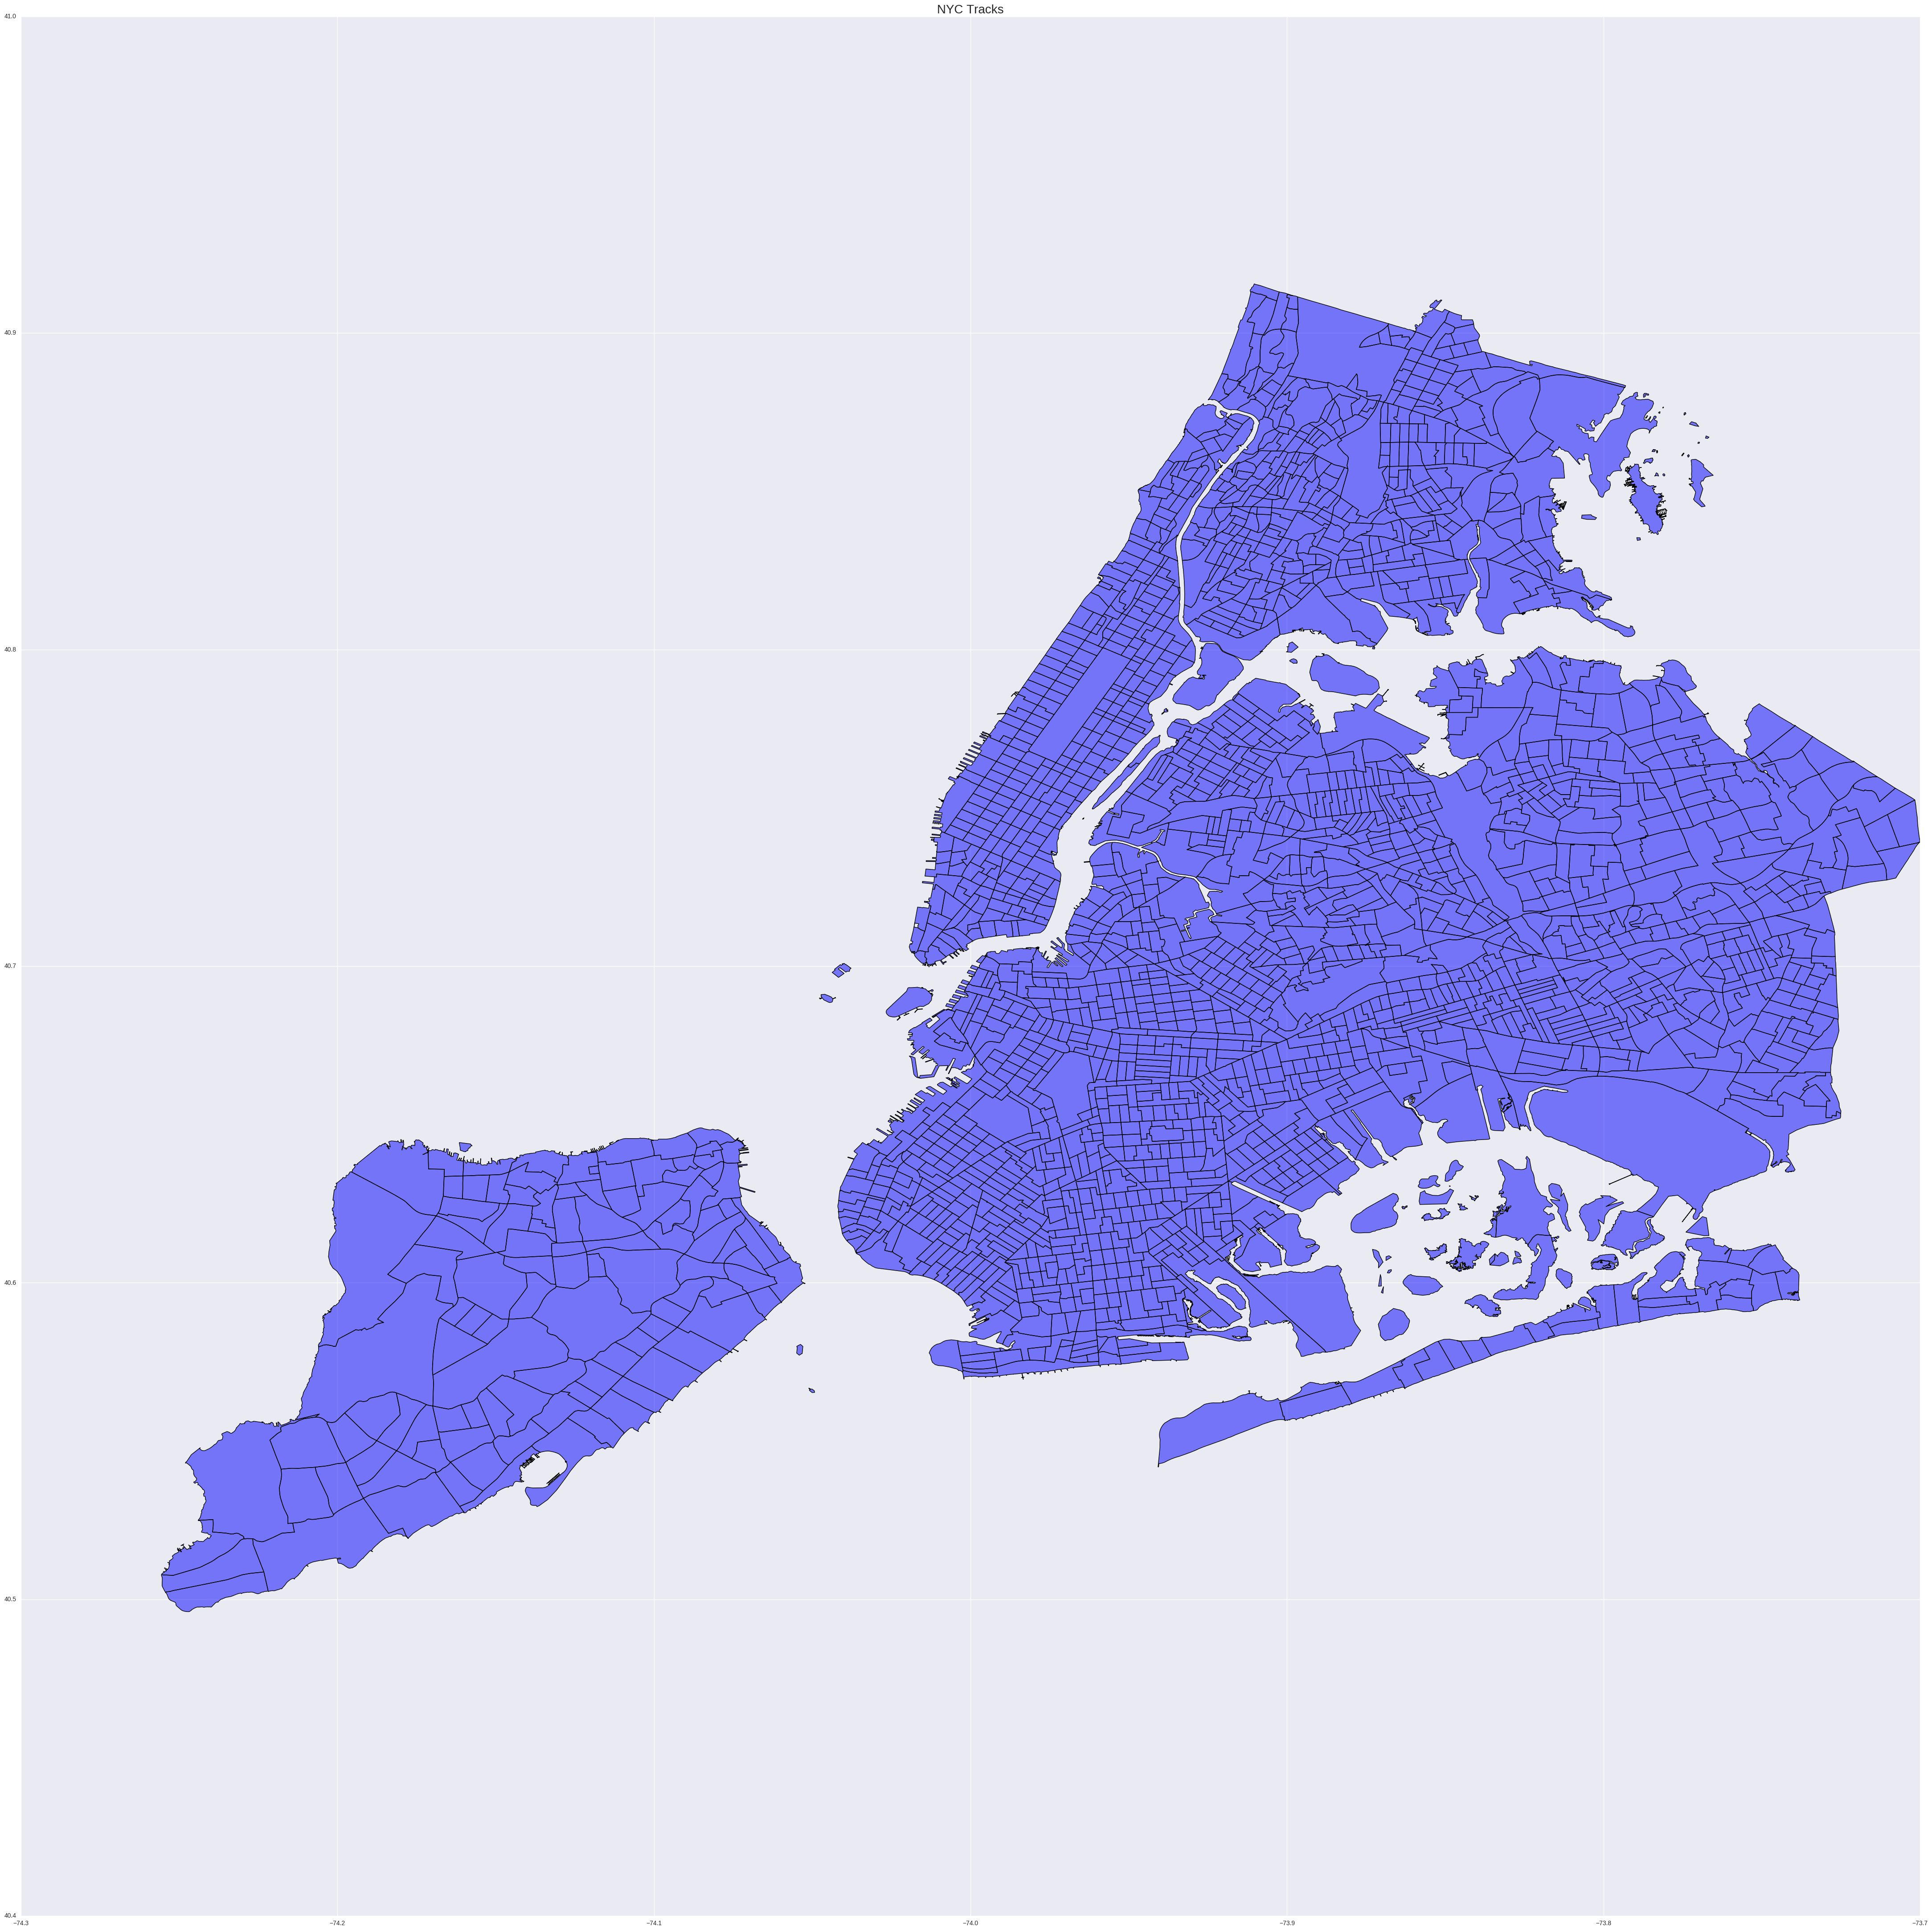

In [6]:
f, ax = pl.subplots(figsize=(55,55))

tracks.plot(linewidth =1, ax = ax,  color='b', label = 'tracks')
#pl.axis('off')
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC Tracks", size=20)

In [7]:
url = 'http://data.insideairbnb.com/united-states/ny/new-york-city/2017-03-02/visualisations/neighbourhoods.geojson'
filebuffer = urllib.urlretrieve(url, filename='Data/neighbourhoods.geojson')
fname = 'Data/neighbourhoods.geojson'
shapeneighbourhoods = gpd.GeoDataFrame.from_file(fname)
shapeneighbourhoods.head(3)

geometry neighbourhood  \
0  (POLYGON ((-73.76670799999999 40.614911, -73.7...     Bayswater   
1  (POLYGON ((-73.782822 40.843919, -73.782572 40...   City Island   
2  (POLYGON ((-73.848597 40.87167, -73.845823 40....      Allerton   

  neighbourhood_group  
0              Queens  
1               Bronx  
2               Bronx

In [8]:
shapeneighbourhoods.crs = from_epsg(4326)

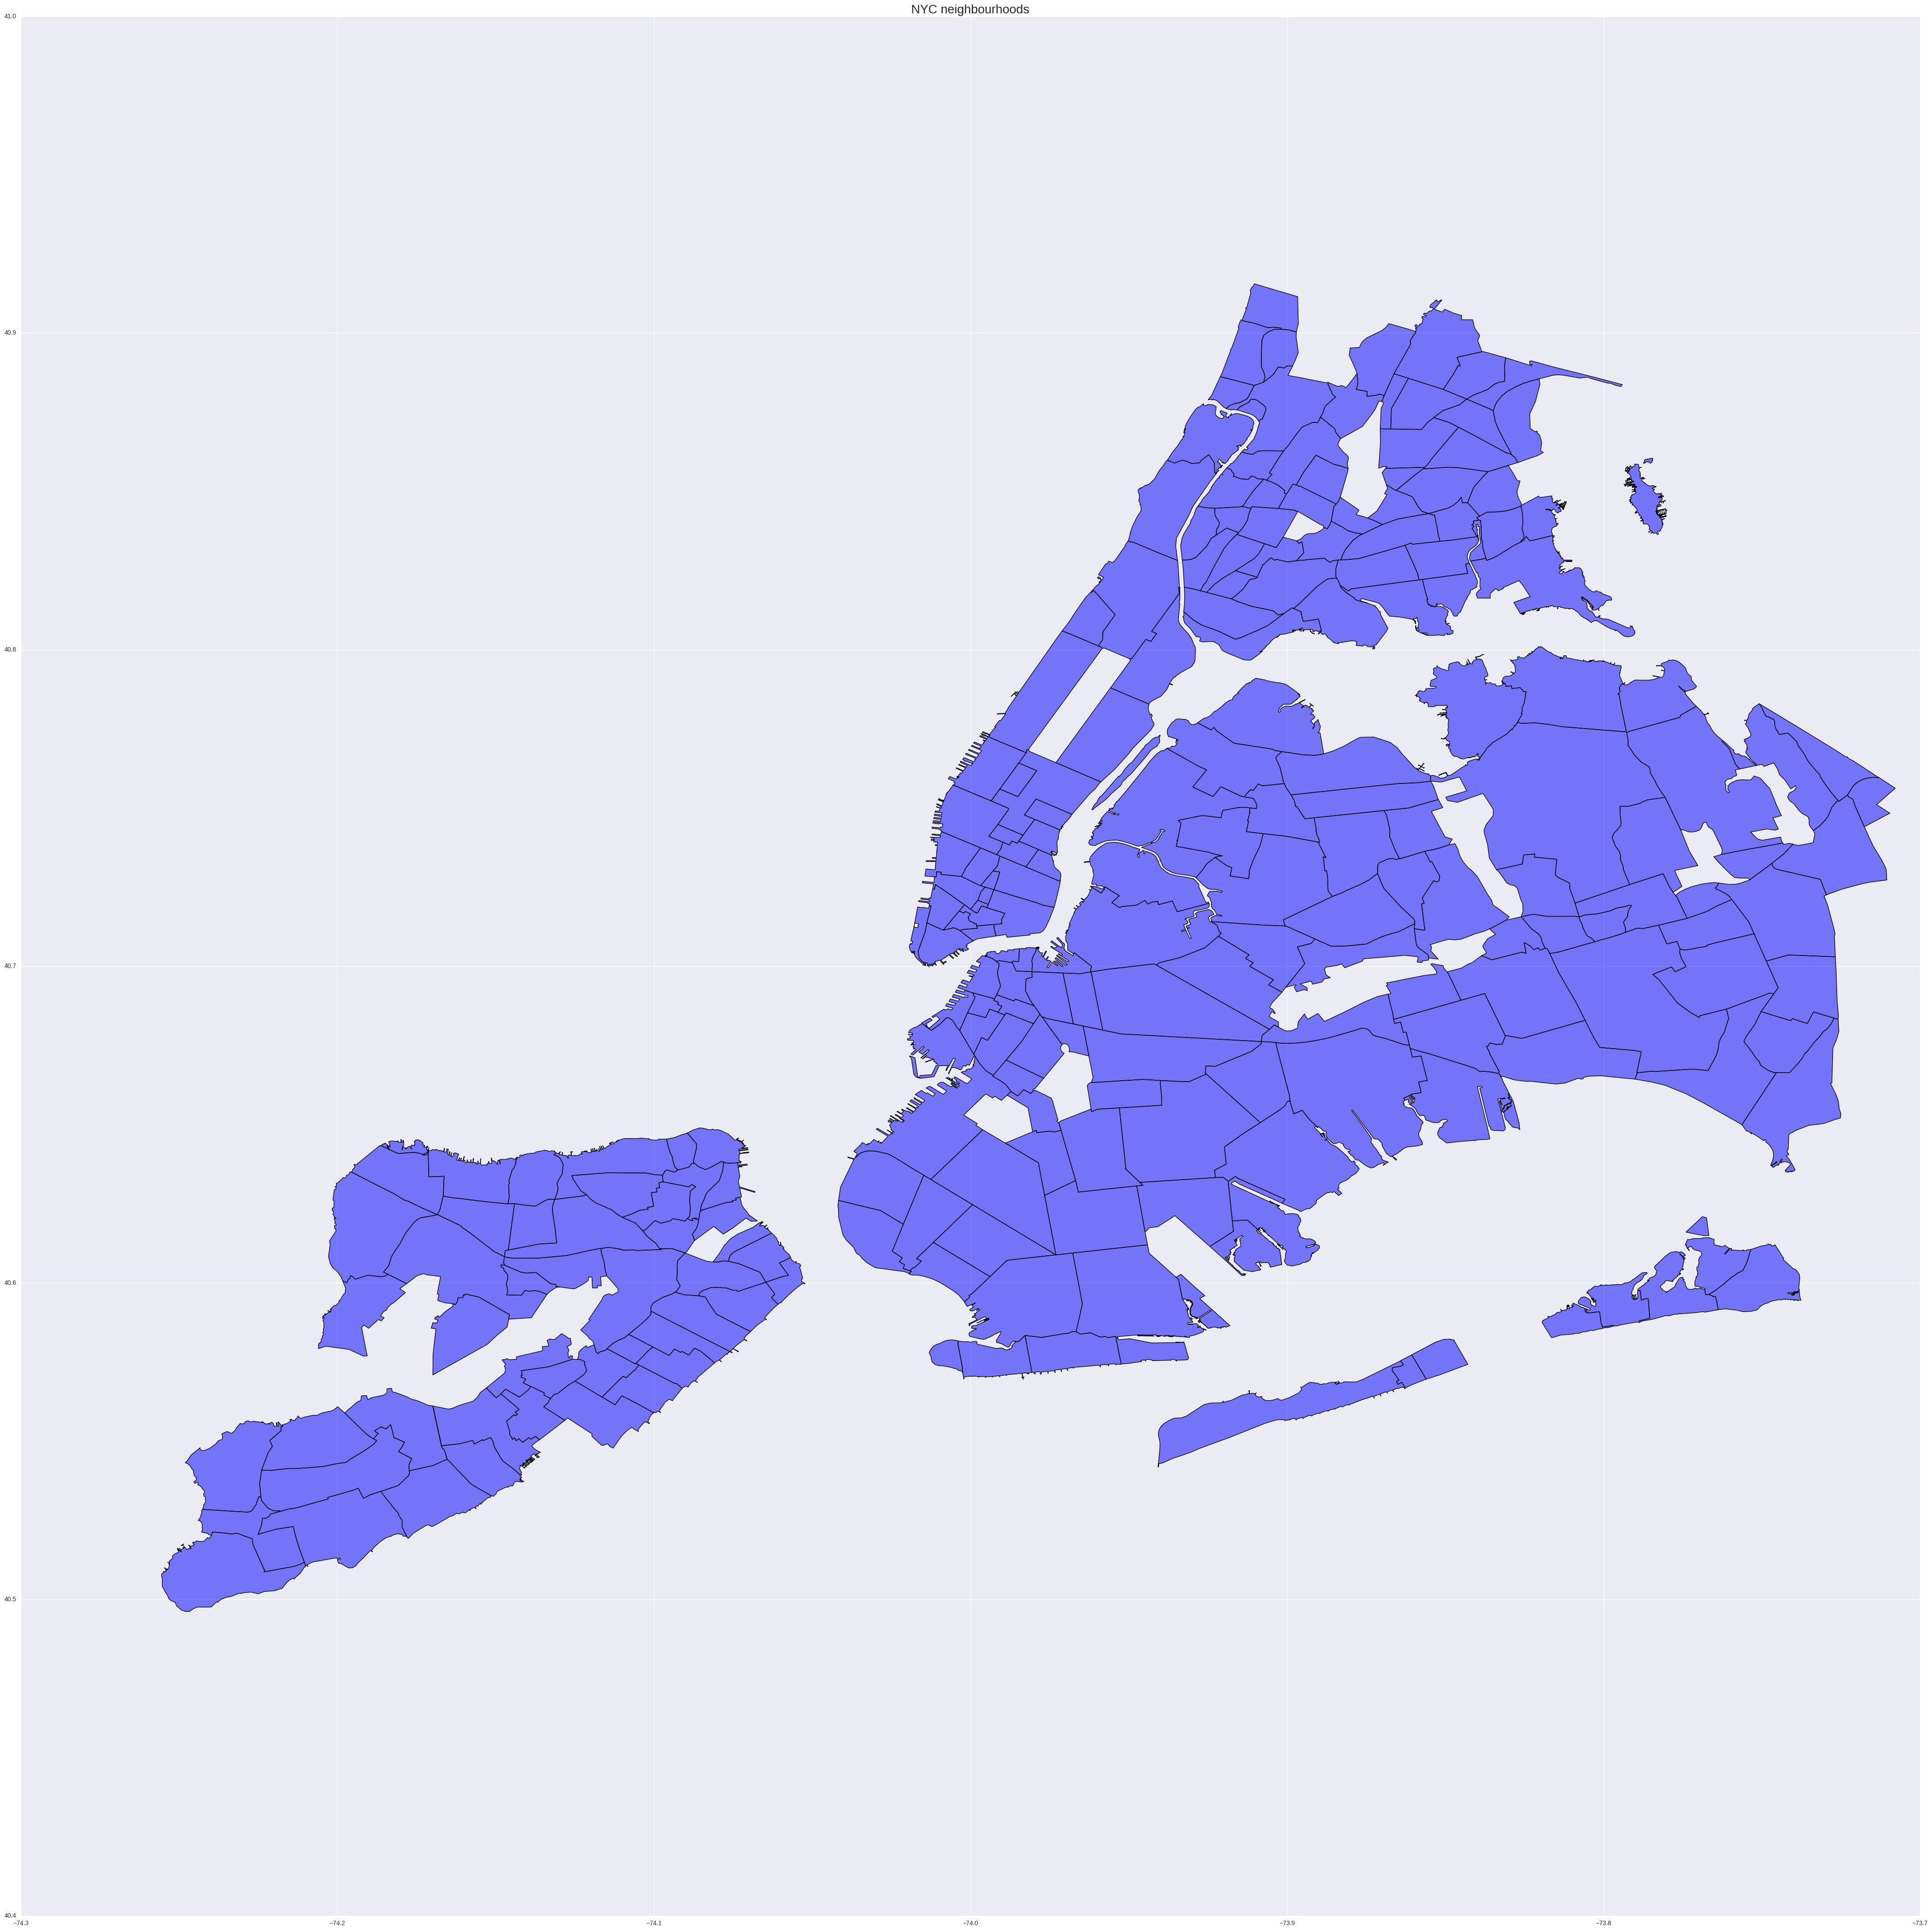

In [9]:
f, ax = pl.subplots(figsize=(55,55))

shapeneighbourhoods.plot(linewidth =1, ax = ax,  color='b', label = 'tracks')
#pl.axis('off')
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC neighbourhoods", size=20)

In [10]:
url = 'http://data.insideairbnb.com/united-states/ny/new-york-city/2017-03-02/visualisations/reviews.csv'
filebuffer = urllib.urlretrieve(url, filename='Data/reviews.csv')
fname = 'Data/reviews.csv'
reviews = pd.DataFrame.from_csv(fname)
reviews.head(3)

date
listing_id            
15194207    2016-10-04
15194207    2016-10-24
15194207    2016-11-02

In [11]:
url = 'http://data.insideairbnb.com/united-states/ny/new-york-city/2017-03-02/visualisations/neighbourhoods.csv'
filebuffer = urllib.urlretrieve(url, filename='Data/neighbourhoods.csv')
fname = 'Data/neighbourhoods.csv'
neighbourhoods = pd.DataFrame.from_csv(fname)
neighbourhoods.head(3)

neighbourhood
neighbourhood_group              
Bronx                    Allerton
Bronx                  Baychester
Bronx                     Belmont

In [12]:
url = 'http://data.insideairbnb.com/united-states/ny/new-york-city/2017-03-02/visualisations/listings.csv'
filebuffer = urllib.urlretrieve(url, filename='Data/listings.csv')
fname = 'Data/listings.csv'
NYClistings = pd.DataFrame.from_csv(fname)
NYClistings.head(3)

name   host_id  \
id                                                                      
9147025                            Cozy City Island Cottage    403032   
3943387                  Cozy City Island Room/Private Bath  20433973   
15220538  Airy and Peaceful Room and Bath in Victorian Home   1843520   

         host_name neighbourhood_group neighbourhood   latitude  longitude  \
id                                                                           
9147025      Diane               Bronx   City Island  40.844870 -73.789541   
3943387      Julia               Bronx   City Island  40.839396 -73.781437   
15220538     Wendy               Bronx   City Island  40.855898 -73.789496   

                room_type  price  minimum_nights  number_of_reviews  \
id                                                                    
9147025   Entire home/apt    125               2                 36   
3943387      Private room     65               1                 21   
15220538     Private room    110               2                  5   

         last_review  reviews_per_month  calculated_host_listings_count  \
id                                                                        
9147025   2017-03-02               2.49                               1   
3943387   2016-10-22               0.75                               1   
15220538  2016-11-26               1.01                               1   

          availability_365  
id                          
9147025                156  
3943387                362  
15220538               365

In [13]:
fname = 'Data/RENT_NYC.geojson'
householdsNYC = gpd.GeoDataFrame.from_file(fname)
householdsNYC.crs = from_epsg(4326)
householdsNYC.head(3)

COUNTY                                  GEO.display-label  \
0  36005  Block Group 0, Census Tract 1, Bronx County, N...   
1  36005  Block Group 1, Census Tract 1, Bronx County, N...   
2  36005  Block Group 0, Census Tract 2, Bronx County, N...   

                  GEO.id       GEO.id2 HD01_VD01 HD01_VD02 HD01_VD03  \
0  1500000US360050001000  360050001000         0         0         0   
1  1500000US360050001001  360050001001         0         0         0   
2  1500000US360050002000  360050002000         0         0         0   

  HD01_VD04 HD01_VD05 HD01_VD06 ... HD01_VD57 HD01_VD58 HD01_VD59 HD01_VD60  \
0         0         0         0 ...         0         0         0         0   
1         0         0         0 ...         0         0         0         0   
2         0         0         0 ...         0         0         0         0   

  HD01_VD61 HD01_VD62 HD01_VD63 HD01_VD64  \
0         0         0         0         0   
1         0         0         0         0   
2         0         0         0         0   

                                            geometry id  
0  POLYGON ((-73.892504 40.801206, -73.872264 40....  1  
1  POLYGON ((-73.892866 40.790567, -73.89039 40.7...  2  
2  POLYGON ((-73.86270399999999 40.797276, -73.86...  3  

[3 rows x 70 columns]

#### 36005 Bronx, NY C bronx code 2 
#### 36081 Queens, NY C queens code 4 
#### 36047 Kings, NY C brooklyn code 3 
#### 36061 New York, NY C manhattan code 1 
#### 36085 Richmond, NY C staten i code 5

In [14]:
householdsNYC['HD01_VD01'] = pd.to_numeric(householdsNYC['HD01_VD01'])

In [15]:
householdsNYC['HD01_VD01'].sum()

2122185

In [16]:
def borocode(COUNTY):
    if COUNTY == '36005':
        return '2'
    if COUNTY =='36081':
        return '4'
    if COUNTY =='36047':
        return '3'
    if COUNTY =='36061':
        return '1'
    if COUNTY =='36085':
        return '5'
    
def boroct(x):
    return x[5:-1]
    

householdsNYC['borocode'] = householdsNYC.COUNTY.map(borocode)
householdsNYC['boro_ct_2010'] = householdsNYC['borocode'] + householdsNYC['GEO.id2'].map(boroct)


In [17]:
householdsNYC.head()

COUNTY                                  GEO.display-label  \
0  36005  Block Group 0, Census Tract 1, Bronx County, N...   
1  36005  Block Group 1, Census Tract 1, Bronx County, N...   
2  36005  Block Group 0, Census Tract 2, Bronx County, N...   
3  36005  Block Group 1, Census Tract 2, Bronx County, N...   
4  36005  Block Group 2, Census Tract 2, Bronx County, N...   

                  GEO.id       GEO.id2  HD01_VD01 HD01_VD02 HD01_VD03  \
0  1500000US360050001000  360050001000          0         0         0   
1  1500000US360050001001  360050001001          0         0         0   
2  1500000US360050002000  360050002000          0         0         0   
3  1500000US360050002001  360050002001        231        54         0   
4  1500000US360050002002  360050002002        309        71         0   

  HD01_VD04 HD01_VD05 HD01_VD06     ...      HD01_VD59 HD01_VD60 HD01_VD61  \
0         0         0         0     ...              0         0         0   
1         0         0         0     ...              0         0         0   
2         0         0         0     ...              0         0         0   
3         0         0         0     ...              0         0         0   
4         0         0         0     ...              0         0         0   

  HD01_VD62 HD01_VD63 HD01_VD64  \
0         0         0         0   
1         0         0         0   
2         0         0         0   
3         0         0         0   
4         0         0         0   

                                            geometry id borocode boro_ct_2010  
0  POLYGON ((-73.892504 40.801206, -73.872264 40....  1        2      2000100  
1  POLYGON ((-73.892866 40.790567, -73.89039 40.7...  2        2      2000100  
2  POLYGON ((-73.86270399999999 40.797276, -73.86...  3        2      2000200  
3  POLYGON ((-73.85772 40.813362, -73.85913699999...  4        2      2000200  
4  POLYGON ((-73.85913699999999 40.813171, -73.85...  5        2      2000200  

[5 rows x 72 columns]

In [18]:
print householdsNYC.groupby('boro_ct_2010').sum().shape
count = householdsNYC.groupby('boro_ct_2010').sum()
count.reset_index(inplace = True)
count.head(3)

(2166, 1)


boro_ct_2010  HD01_VD01
0      1000100          0
1      1000201        972
2      1000202       2649

In [19]:
tracks = pd.merge(tracks, count, on='boro_ct_2010')

In [20]:
tracks.head(3)

boro_code boro_ct_2010      boro_name cdeligibil ct_2010 ctlabel  \
0         5      5000900  Staten Island          I  000900       9   
1         1      1009800      Manhattan          I  009800      98   
2         1      1010000      Manhattan          I  010000     100   

                                            geometry ntacode  \
0  (POLYGON ((-74.07920577013245 40.6434307837456...    SI22   
1  (POLYGON ((-73.96432543478758 40.7563815309909...    MN19   
2  (POLYGON ((-73.96802436915851 40.7595781400528...    MN19   

                                     ntaname  puma     shape_area  \
0  West New Brighton-New Brighton-St. George  3903  2497009.69813   
1                    Turtle Bay-East Midtown  3808  1906016.35002   
2                    Turtle Bay-East Midtown  3808  1860938.37721   

      shape_leng  HD01_VD01  
0  7729.01679376        435  
1  5534.19981063       2628  
2  5692.16873705        886

In [21]:
households = tracks[tracks.HD01_VD01 > 0].HD01_VD01
households = ps.Quantiles(households, k=6)
households

                  Quantiles                  
 
 Lower              Upper               Count
           x[i] <=  292.000               356
 292.000 < x[i] <=  503.000               350
 503.000 < x[i] <=  772.000               352
 772.000 < x[i] <= 1134.000               351
1134.000 < x[i] <= 1691.000               353
1691.000 < x[i] <= 7945.000               352

In [22]:
tracks[tracks.HD01_VD01 > 0].HD01_VD01.min()

4

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))


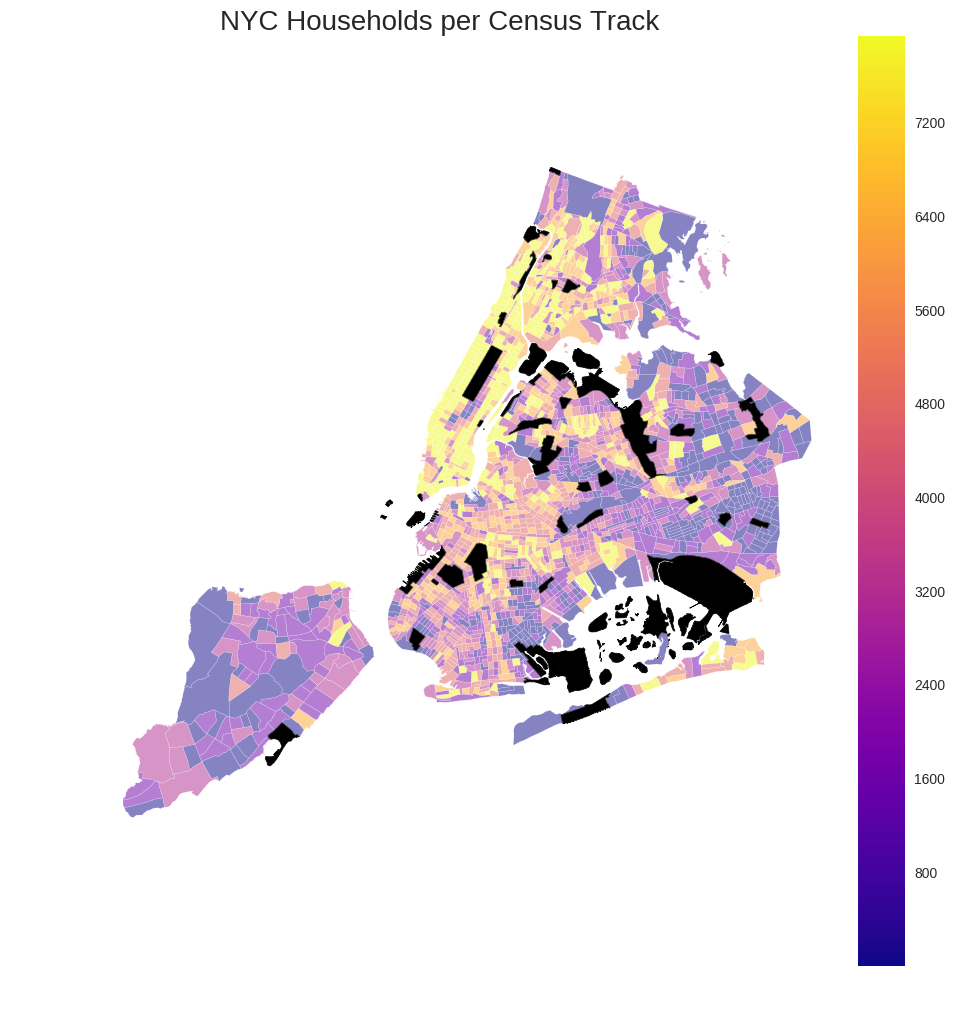

In [23]:
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap    
mycolor = ListedColormap('k')

f, ax = pl.subplots(figsize=(12,12))
pl.xlabel('longitude')
pl.ylabel('latitude')
#pl.ylim(40.6, 40.8)
#pl.xlim(-74.05, -73.85)

tracks[tracks['HD01_VD01']==0].plot(c = 'k', linewidth = .5, ax = ax, cmap=mycolor, alpha=1)
tracks[tracks['HD01_VD01']>0].assign(cl = households.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=False)

#tracks.assign(cl = households.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
#                                          ax=ax, cmap='plasma', edgecolor='white', legend=False)

pl.axis('off')
pl.title("NYC Households per Census Track", size=20)

normalize = mcolors.Normalize(vmin=tracks[tracks.HD01_VD01 > 0].HD01_VD01.min(),vmax=tracks.HD01_VD01.max())
colormap = cm.plasma
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)

#scalarmappaple.set_array(tracks.assign(cl = households.yb))


scalarmappaple.set_array(tracks[tracks['HD01_VD01']>0].assign(cl = households.yb))


pl.colorbar(scalarmappaple, ax=ax)
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [24]:
from shapely.geometry import Polygon
from shapely.geometry import Point

In [ ]:
def getdata(row):
    return row['id'], row['neighbourhood_group'],  float(row['longitude']), float(row['latitude'])

with open('Data/listings.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    output = map(getdata, reader)       
output[:10]

[('9147025', 'Bronx', -73.78954050381778, 40.8448695719099),
 ('3943387', 'Bronx', -73.78143724844766, 40.839396193871046),
 ('15220538', 'Bronx', -73.78949621071705, 40.8558982857858),
 ('6627449', 'Bronx', -73.78660938743727, 40.84977456920603),
 ('7949480', 'Bronx', -73.78867963460137, 40.85205377887418),
 ('16042478', 'Bronx', -73.78860659381962, 40.85349118988138),
 ('5557381', 'Bronx', -73.78932759494228, 40.850023814160465),
 ('1886820', 'Bronx', -73.78305228672215, 40.84114416028828),
 ('2831277', 'Bronx', -73.7911010857536, 40.85527435521511),
 ('11675715', 'Bronx', -73.78413886754988, 40.851391475520586)]

In [ ]:
import time

def searchtrack(row):
    listid,boro,lon,lat = row
    
    if boro=='Bronx':
        validtracks = tracks[tracks['boro_name']=='Bronx']
        for idx in validtracks.index:
            if Point(lon, lat).within(validtracks.ix[idx]['geometry']):
                return validtracks.ix[idx]['boro_ct_2010']

    if boro=='Queens':
        validtracks = tracks[tracks['boro_name']=='Queens']
        for idx in validtracks.index:
            if Point(lon, lat).within(validtracks.ix[idx]['geometry']):
                return validtracks.ix[idx]['boro_ct_2010']

    if boro=='Brooklyn':
        validtracks = tracks[tracks['boro_name']=='Brooklyn']
        for idx in validtracks.index:
            if Point(lon, lat).within(validtracks.ix[idx]['geometry']):
                return validtracks.ix[idx]['boro_ct_2010']

    if boro=='Staten Island':
        validtracks = tracks[tracks['boro_name']=='Staten Island']
        for idx in validtracks.index:
            if Point(lon, lat).within(validtracks.ix[idx]['geometry']):
                return validtracks.ix[idx]['boro_ct_2010']
            
    if boro=='Manhattan':
        validtracks = tracks[tracks['boro_name']=='Manhattan']
        for idx in validtracks.index:
            if Point(lon, lat).within(validtracks.ix[idx]['geometry']):
                return validtracks.ix[idx]['boro_ct_2010']
            
start_time = time.time()            
out = map(searchtrack,output)
print("--- %s seconds ---" % (time.time() - start_time))
out[:10]

In [ ]:
2500.88100004 /60

In [ ]:
print len(output)
print len(out)
print len(NYClistings)
NYClistings['boro_ct_2010']=out

In [ ]:
len(tracks)

In [ ]:
listingcounts = NYClistings.groupby('boro_ct_2010').count()[['name']].reset_index()
listingcounts.columns = [['boro_ct_2010','Number_of_listings']]

tracks = tracks.merge(listingcounts, on='boro_ct_2010', how='left')

len(tracks)

In [ ]:
tracks.Number_of_listings.fillna(value=0, method=None, axis=None, inplace=True, limit=None)

In [ ]:
Number_of_listings = tracks[tracks.Number_of_listings > 0].Number_of_listings
Number_of_listings = ps.Quantiles(Number_of_listings, k=6)
Number_of_listings

In [ ]:
f, ax = pl.subplots(figsize=(12,12))
pl.xlabel('longitude')
pl.ylabel('latitude')
#pl.ylim(40.6, 40.8)
#pl.xlim(-74.05, -73.85)

tracks[tracks['Number_of_listings']==0].plot(c = 'k', linewidth = .5, ax = ax, cmap=mycolor, alpha=1)
tracks[tracks['Number_of_listings']>0].assign(cl = Number_of_listings.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=False)



pl.axis('off')
pl.title("NYC Number_of_listings per Census Track", size=20)

normalize = mcolors.Normalize(vmin=tracks[tracks.Number_of_listings > 0].Number_of_listings.min(),vmax=tracks.Number_of_listings.max())
colormap = cm.plasma
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)

#scalarmappaple.set_array(tracks.assign(cl = households.yb))


scalarmappaple.set_array(tracks[tracks['Number_of_listings']>0].assign(cl = Number_of_listings.yb))


pl.colorbar(scalarmappaple, ax=ax)

In [60]:
with open('Data/tracks_listing_households.geojson', 'w') as f:
    f.write(tracks.to_json())


In [61]:
fileUrl = 'https://data.cityofnewyork.us/api/geospatial/arq3-7z49?method=export&format=GeoJSON'
filebuffer = urllib.urlretrieve(fileUrl, filename='Data/Subway Stations.geojson')
fname = 'Subway Stations.geojson'
print (fname)
subStations = gpd.GeoDataFrame.from_file('Data/Subway Stations.geojson')

subStations.crs = from_epsg(4326)

Subway Stations.geojson


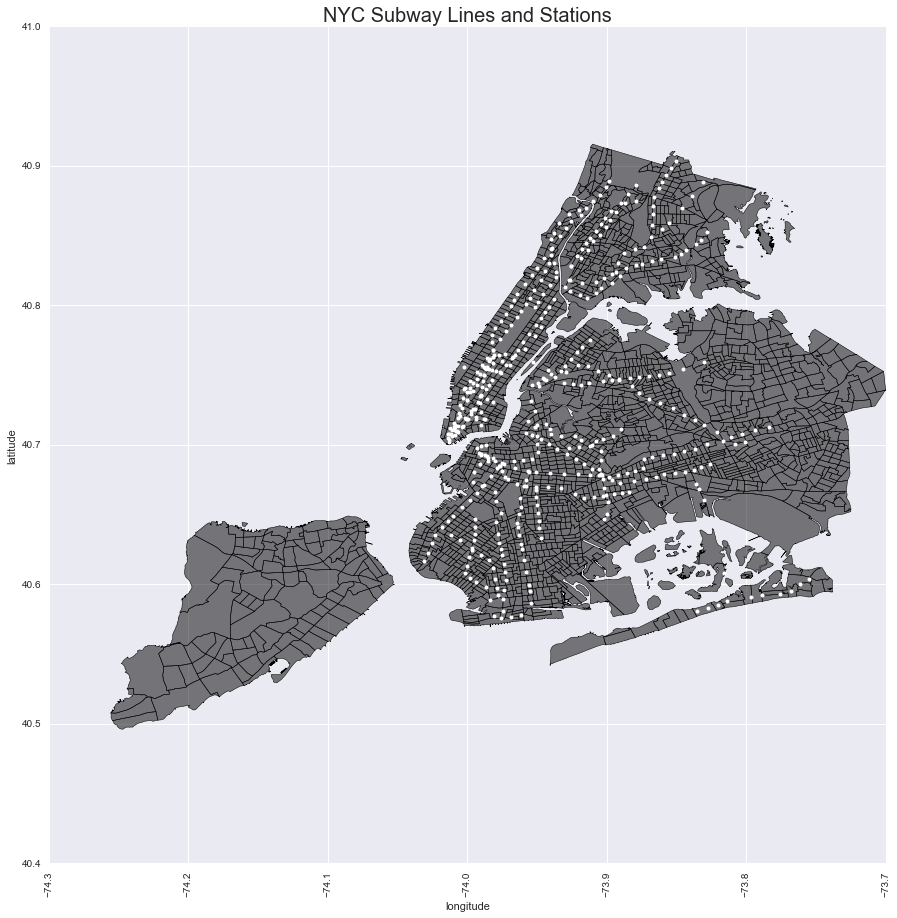

In [66]:
f, ax = pl.subplots(figsize=(15,15))
tracks.plot(linewidth = 0.5, color = 'k', ax = ax)
subStations.plot(linewidth = 0.8, color = 'w', ax = ax, markersize=4)
pl.xlabel('longitude')
pl.ylabel('latitude')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC Subway Lines and Stations", size=20)

In [68]:
len(subStations)*40000

18920000

In [69]:
subStations.head()

geometry           line  \
0  POINT (-73.99106999861967 40.73005400028978)  4-6-6 Express   
1  POINT (-74.00019299927328 40.71880300107709)  4-6-6 Express   
2  POINT (-73.98384899986625 40.76172799961419)            1-2   
3  POINT (-73.97499915116808 40.68086213682956)          2-3-4   
4  POINT (-73.89488591154061 40.66471445143568)            3-4   

               name                                              notes  \
0          Astor Pl  4 nights, 6-all times, 6 Express-weekdays AM s...   
1          Canal St  4 nights, 6-all times, 6 Express-weekdays AM s...   
2           50th St                              1-all times, 2-nights   
3         Bergen St           4-nights, 3-all other times, 2-all times   
4  Pennsylvania Ave                        4-nights, 3-all other times   

  objectid                                url  
0        1  http://web.mta.info/nyct/service/  
1        2  http://web.mta.info/nyct/service/  
2        3  http://web.mta.info/nyct/service/  
3        4  http://web.mta.info/nyct/service/  
4        5  http://web.mta.info/nyct/service/

In [105]:
geometry=[]
for i in range(len(NYClistings)):
    #NYClistings.geometry.iloc[i]= Point(NYClistings.longitude.iloc[i],NYClistings.latitude.iloc[i])
    geometry.append(Point(NYClistings.longitude.iloc[i],NYClistings.latitude.iloc[i]))

In [117]:
NYClistings = gpd.GeoDataFrame(NYClistings, crs={'init': 'epsg:4326'}, geometry=geometry)

In [118]:
NYClistings.head()

name   host_id  \
id                                                                      
9147025                            Cozy City Island Cottage    403032   
3943387                  Cozy City Island Room/Private Bath  20433973   
15220538  Airy and Peaceful Room and Bath in Victorian Home   1843520   
6627449                      Large 1 BDRM in Great location  13886510   
7949480   City Island Sanctuary relaxing BR & Bath w Par...    119445   

               host_name neighbourhood_group neighbourhood   latitude  \
id                                                                      
9147025            Diane               Bronx   City Island  40.844870   
3943387            Julia               Bronx   City Island  40.839396   
15220538           Wendy               Bronx   City Island  40.855898   
6627449           Arlene               Bronx   City Island  40.849775   
7949480   Linda & Didier               Bronx   City Island  40.852054   

          longitude        room_type  price  minimum_nights  \
id                                                            
9147025  -73.789541  Entire home/apt    125               2   
3943387  -73.781437     Private room     65               1   
15220538 -73.789496     Private room    110               2   
6627449  -73.786609  Entire home/apt    125               3   
7949480  -73.788680     Private room     99               1   

          number_of_reviews last_review  reviews_per_month  \
id                                                           
9147025                  36  2017-03-02               2.49   
3943387                  21  2016-10-22               0.75   
15220538                  5  2016-11-26               1.01   
6627449                  12  2016-10-24               0.59   
7949480                  23  2017-02-26               1.68   

          calculated_host_listings_count  availability_365 boro_ct_2010  \
id                                                                        
9147025                                1               156      2051600   
3943387                                1               362      2051600   
15220538                               1               365      2051600   
6627449                                1               335      2051600   
7949480                                1               174      2051600   

                                              geometry  
id                                                      
9147025    POINT (-73.78954050381778 40.8448695719099)  
3943387   POINT (-73.78143724844766 40.83939619387105)  
15220538   POINT (-73.78949621071705 40.8558982857858)  
6627449   POINT (-73.78660938743727 40.84977456920603)  
7949480   POINT (-73.78867963460138 40.85205377887418)

In [148]:
from geopy.distance import vincenty

def getYX(pt):
    return pt.y, pt.x
getYX(subStations.geometry[0])

(40.73005400028978, -73.99106999861966)

In [149]:
accesstosubway=[]
for point in NYClistings.geometry:
    #print point
    x=0
    for point2 in subStations.geometry:
        #print point2
        #print point.distance(point2)
        x = x + vincenty(getYX(point), getYX(point2)).miles
        #print x
    accesstosubway.append(x)#/len(subStations))
NYClistings['accesstosubway']=accesstosubway

In [152]:
NYClistings['accesstosubway']=NYClistings['accesstosubway']/len(subStations)

In [166]:
accesstosubwaydf = NYClistings.groupby('boro_ct_2010').mean().iloc[::,-1::].reset_index()

tracks = tracks.merge(accesstosubwaydf, on='boro_ct_2010', how='left')
len(tracks)

2164

In [168]:
tracks.accesstosubway.fillna(value=0, method=None, axis=None, inplace=True, limit=None)

In [167]:
tracks.head()

boro_code boro_ct_2010      boro_name cdeligibil ct_2010 ctlabel  \
0         5      5000900  Staten Island          I  000900       9   
1         1      1009800      Manhattan          I  009800      98   
2         1      1010000      Manhattan          I  010000     100   
3         1      1010200      Manhattan          I  010200     102   
4         1      1010400      Manhattan          I  010400     104   

                                            geometry ntacode  \
0  (POLYGON ((-74.07920577013245 40.6434307837456...    SI22   
1  (POLYGON ((-73.96432543478758 40.7563815309909...    MN19   
2  (POLYGON ((-73.96802436915851 40.7595781400528...    MN19   
3  (POLYGON ((-73.97124277307127 40.7609364184790...    MN17   
4  (POLYGON ((-73.97445730550224 40.7622930835248...    MN17   

                                     ntaname  puma     shape_area  \
0  West New Brighton-New Brighton-St. George  3903  2497009.69813   
1                    Turtle Bay-East Midtown  3808  1906016.35002   
2                    Turtle Bay-East Midtown  3808  1860938.37721   
3                      Midtown-Midtown South  3807  1860992.70485   
4                      Midtown-Midtown South  3807  1864600.41684   

      shape_leng  HD01_VD01  Number_of_listings  accesstosubway  
0  7729.01679376        435                 8.0       10.590662  
1  5534.19981063       2628               123.0        5.674483  
2  5692.16873705        886                36.0        5.753199  
3  5687.80243866         86                10.0        5.823025  
4  5693.03636727        347                 8.0        5.918099

In [169]:
access_to_subway = tracks[tracks.accesstosubway > 0].accesstosubway
access_to_subway = ps.Quantiles(access_to_subway, k=6)
access_to_subway

                Quantiles                
 
Lower            Upper              Count
         x[i] <=  5.957               288
 5.957 < x[i] <=  6.594               287
 6.594 < x[i] <=  7.613               287
 7.613 < x[i] <=  8.699               287
 8.699 < x[i] <= 10.268               287
10.268 < x[i] <= 22.845               288

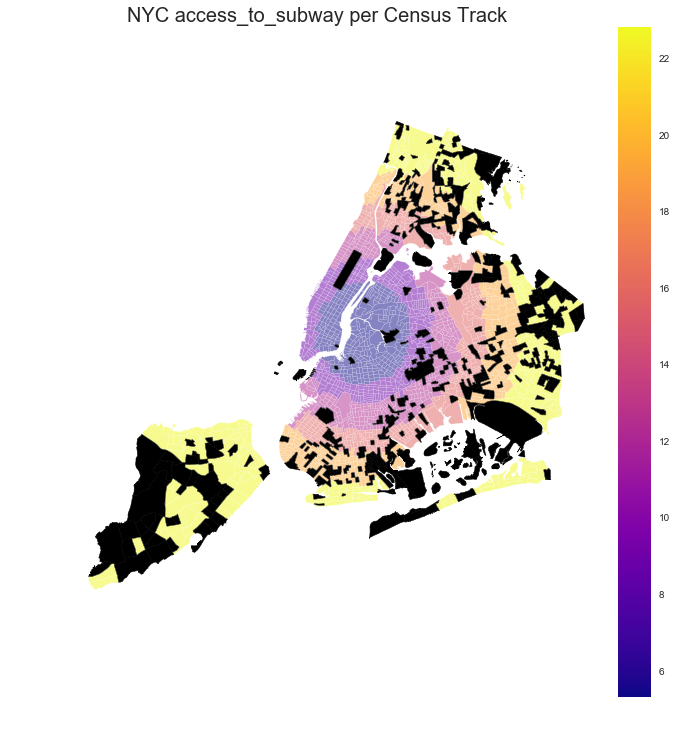

In [170]:
f, ax = pl.subplots(figsize=(12,12))
pl.xlabel('longitude')
pl.ylabel('latitude')
#pl.ylim(40.6, 40.8)
#pl.xlim(-74.05, -73.85)

tracks[tracks['accesstosubway']==0].plot(c = 'k', linewidth = .5, ax = ax, cmap=mycolor, alpha=1)
tracks[tracks['accesstosubway']>0].assign(cl = access_to_subway.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=False)



pl.axis('off')
pl.title("NYC access_to_subway per Census Track", size=20)

normalize = mcolors.Normalize(vmin=tracks[tracks.accesstosubway > 0].accesstosubway.min(),vmax=tracks.accesstosubway.max())
colormap = cm.plasma
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)

#scalarmappaple.set_array(tracks.assign(cl = households.yb))


scalarmappaple.set_array(tracks[tracks['accesstosubway']>0].assign(cl = access_to_subway.yb))


pl.colorbar(scalarmappaple, ax=ax)

In [171]:
with open('Data/tracks_listing_households.geojson', 'w') as f:
    f.write(tracks.to_json())
with open('Data/NYClisting.geojson', 'w') as f:
    f.write(NYClistings.to_json())

In [ ]:
def getYXformat(pt):
    return {"lat":(pt.y),"lon":(pt.x)}

In [222]:
def getYXformat(pt):
    return {"lat":pt.y,"lon":pt.x}

In [223]:
substationlist=[]
for point in subStations.geometry:
    substationlist.append(getYXformat(point))

In [226]:
str(substationlist[:3])
#(substationlist[:3])

"[{'lat': 40.73005400028978, 'lon': -73.99106999861966}, {'lat': 40.71880300107709, 'lon': -74.00019299927328}, {'lat': 40.76172799961419, 'lon': -73.98384899986625}]"

In [263]:
url = 'http://matrix.mapzen.com/sources_to_targets?json={"sources":[{"lat":' + \
str(getYX(tracks.geometry[0].centroid)[0])  + ',"lon":' + str(getYX(tracks.geometry[0].centroid)[1])\
+ '}],"targets":' + str(substationlist[:50]) + \
',"costing":"pedestrian"}&id=NYCSubway&api_key=' + (os.getenv("MAPZENKEY"))
url = url.replace(' ','')
url = url.replace("'",'"')
print url
response = urllib2.urlopen(url)
data = response.read().decode('utf-8')
dataDict = json.loads(data)

http://matrix.mapzen.com/sources_to_targets?json={"sources":[{"lat":40.6422041596,"lon":-74.0828563924}],"targets":[{"lat":40.73005400028978,"lon":-73.99106999861966},{"lat":40.71880300107709,"lon":-74.00019299927328},{"lat":40.76172799961419,"lon":-73.98384899986625},{"lat":40.68086213682956,"lon":-73.97499915116808},{"lat":40.66471445143568,"lon":-73.89488591154061},{"lat":40.88466700064975,"lon":-73.90087000018522},{"lat":40.800581558114956,"lon":-73.95806670661364},{"lat":40.67991899941601,"lon":-73.94085899871263},{"lat":40.74971952935675,"lon":-73.8987883783301},{"lat":40.75196004401078,"lon":-73.92901818461539},{"lat":40.71830605618619,"lon":-73.98740940202974},{"lat":40.67802821447783,"lon":-73.89165772702445},{"lat":40.68152000045683,"lon":-73.87962599910783},{"lat":40.69516599823373,"lon":-73.84443500029684},{"lat":40.690648119969794,"lon":-73.98177094440949},{"lat":40.58326843810286,"lon":-73.82758075034528},{"lat":40.58809156457325,"lon":-73.81365140419632},{"lat":40.829987

In [265]:
for i in range(len(substationlist[:50])):
    print i
    print dataDict['sources_to_targets'][0][i]['distance'], 'km'
    print float(dataDict['sources_to_targets'][0][i]['time'])/60
    

0
13.466 km
81.8833333333
1
11.973 km
64.3666666667
2
17.026 km
124.333333333
3
15.756 km
108.966666667
4
30.715 km
210.0
5
33.594 km
319.4
6
22.025 km
183.516666667
7
18.308 km
139.066666667
8
29.924 km
177.683333333
9
27.228 km
145.933333333
10
12.795 km
74.1
11
29.871 km
199.916666667
12
30.903 km
212.083333333
13
33.07 km
237.833333333
14
14.526 km
94.45
15
36.097 km
348.566666667
16
44.371 km
371.366666667
17
37.75 km
270.3
18
36.674 km
257.65
19
29.704 km
274.066666667
20
28.462 km
258.916666667
21
26.917 km
240.75
22
34.274 km
228.833333333
23
32.152 km
203.833333333
24
35.702 km
245.683333333
25
43.07 km
333.2
26
24.209 km
208.866666667
27
40.987 km
308.433333333
28
11.239 km
55.65
29
41.478 km
313.983333333
30
16.193 km
114.133333333
31
15.334 km
103.966666667
32
20.615 km
166.416666667
33
19.084 km
148.366666667
34
28.048 km
178.2
35
16.188 km
114.05
36
31.199 km
192.683333333
37
20.006 km
159.05
38
41.589 km
315.433333333
39
43.829 km
341.866666667
40
36.219 km
350.6
41
17.7

In [243]:
dataDict['sources_to_targets'][0][0]['distance']
float(dataDict['sources_to_targets'][0][0]['time'])/60

20.4

In [259]:
getYX(tracks.geometry[0].centroid)[1]

-74.08285639236246

In [257]:
for track in tracks.geometry:
    track.centroid
    #track
    break
#tracks.geometry.centroid()

In [ ]:
url = 'http://matrix.mapzen.com/sources_to_targets?json={"sources":[{"lat":'\\
+  str(getYX(tracks.geometry[0].centroid)[0])  + ',"lon":' + str(getYX(tracks.geometry[0].centroid)[1]) + \\
'}],"targets":' + str(substationlist[:3]) + \\
',"costing":"pedestrian"}&id=NYCSubway&api_key=' + (os.getenv("MAPZENKEY"))

url = 'http://matrix.mapzen.com/isochrone?json={"locations":[{"lat":'+str(getXY(subStations[subStations.line=='L'].geometry.iloc[0])[1])+',"lon":'+str(getXY(subStations[subStations.line=='L'].geometry.iloc[0])[0])+'}],"costing":"pedestrian","contours":[{"time":15,"color":"ff0000"}]}&id=Walk_From_L&api_key='+(os.getenv("MAPZENKEY"))
response = urllib2.urlopen(url)
data = response.read().decode('utf-8')
dataDict = json.loads(data)
mainPolygon = Polygon(dataDict['features'][0]['geometry']['coordinates'])
sleep(3) ### avoid being blocked by the MapzenAPI services
for station in subStations[subStations.line=='L'].geometry[1:]:
    url='http://matrix.mapzen.com/isochrone?json={"locations":[{"lat":'+str(getXY(station)[1])+',"lon":'+str(getXY(station)[0])+'}],"costing":"pedestrian","contours":[{"time":15,"color":"ff0000"}]}&id=Walk_From_L&api_key='+(os.getenv("MAPZENKEY"))
    response = urllib2.urlopen(url)
    data = response.read().decode('utf-8')
    dataDict = json.loads(data)
    secPolygon = Polygon(dataDict['features'][0]['geometry']['coordinates'])
    mainPolygon = cascaded_union([mainPolygon,secPolygon])
    sleep(3)

In [ ]:
f, ax = pl.subplots(figsize=(12,12))
pl.xlabel('longitude')
pl.ylabel('latitude')
#pl.ylim(40.6, 40.8)
#pl.xlim(-74.05, -73.85)

tracks[tracks['Number_of_listings']==0].plot(c = 'k', linewidth = .5, ax = ax, cmap=mycolor, alpha=1)
tracks[tracks['Number_of_listings']>0].assign(cl = Number_of_listings.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=False)
NYClistings.plot(linewidth = 0.8, color = 'w', ax = ax, markersize=4)


pl.axis('off')
pl.title("NYC Number_of_listings per Census Track", size=20)

normalize = mcolors.Normalize(vmin=tracks[tracks.Number_of_listings > 0].Number_of_listings.min(),vmax=tracks.Number_of_listings.max())
colormap = cm.plasma
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)

#scalarmappaple.set_array(tracks.assign(cl = households.yb))


scalarmappaple.set_array(tracks[tracks['Number_of_listings']>0].assign(cl = Number_of_listings.yb))


pl.colorbar(scalarmappaple, ax=ax)

In [ ]:
16001375